# Stock Data Analysis Practice

#### Importing Packages

In [43]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

#### Getting Data (AAPL, SSNLF, MSFT, DELL, SNE)

In [13]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime.now()

In [55]:
apple = yf.download("AAPL", start, end)
ibm = yf.download("IBM", start, end)
microsoft = yf.download("MSFT", start, end)
dell = yf.download("DELL", start, end)
google = yf.download("GOOG", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [22]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200


#### Plotting stock prices for each tech company

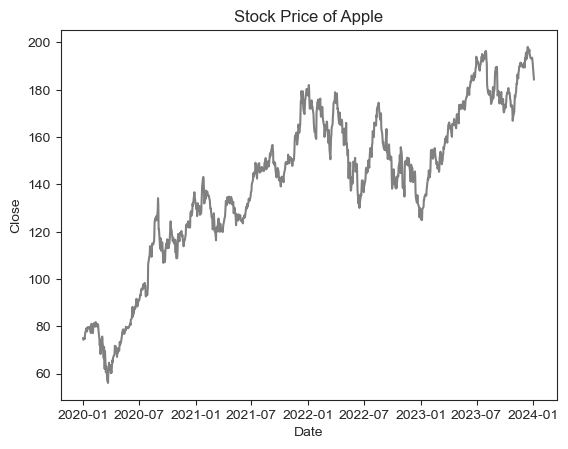

In [53]:
sns.lineplot(data = apple,x = "Date", y = "Close", color = "gray")
plt.title("Stock Price of Apple")
sns.set_style("ticks")

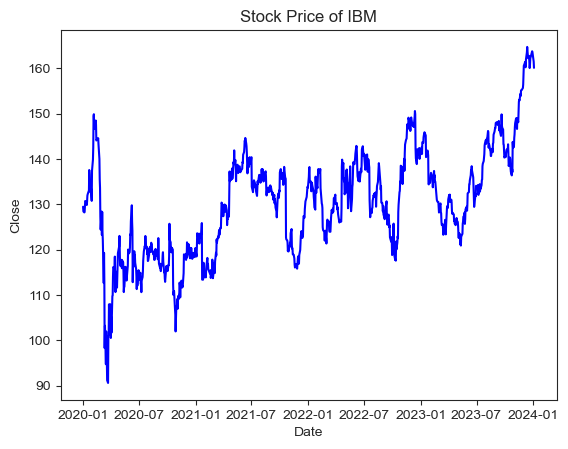

In [57]:
sns.lineplot(data = ibm,x = "Date", y = "Close", color = "blue")
plt.title("Stock Price of IBM")
sns.set_style("ticks")

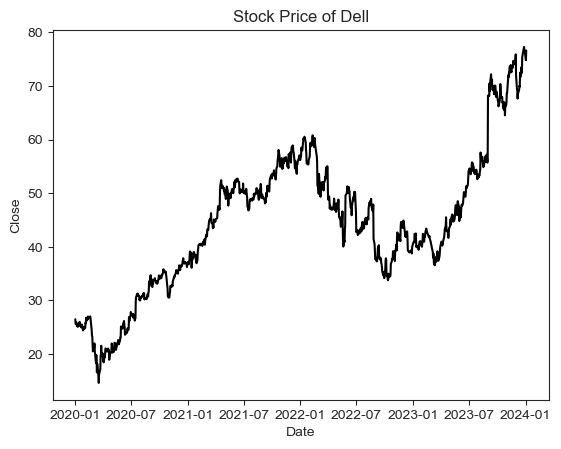

In [72]:
sns.lineplot(data = dell,x = "Date", y = "Close", color = "black")
plt.title("Stock Price of Dell")
sns.set_style("ticks")

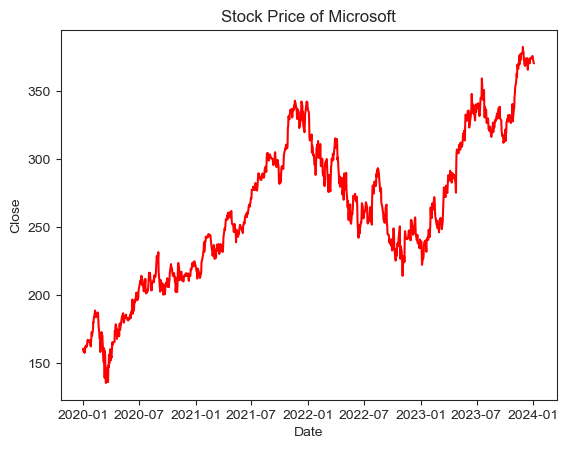

In [73]:
sns.lineplot(data = microsoft,x = "Date", y = "Close", color = "red")
plt.title("Stock Price of Microsoft")
sns.set_style("ticks")

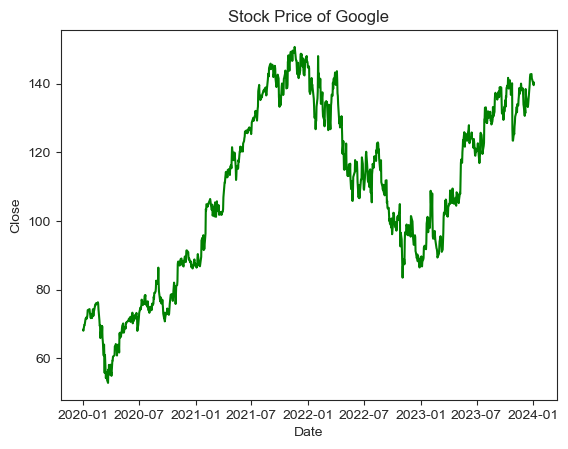

In [74]:
sns.lineplot(data = google,x = "Date", y = "Close", color = "green")
plt.title("Stock Price of Google")
sns.set_style("ticks")

#### Concatenating them into a single df

In [66]:
tickers = ["AAPL", "DELL", "GOOG", "IBM", "MSFT"]

In [68]:
tech_stocks = pd.concat([apple, dell, google, ibm, microsoft], axis = 1, keys = tickers)

In [69]:
tech_stocks.columns.names = ['Tech Ticker', 'Stock Info']

In [70]:
tech_stocks.head()

Tech Ticker       AAPL                                                         \
Stock Info        Open       High        Low      Close  Adj Close     Volume   
Date                                                                            
2020-01-02   74.059998  75.150002  73.797501  75.087502  73.152649  135480400   
2020-01-03   74.287498  75.144997  74.125000  74.357498  72.441460  146322800   
2020-01-06   73.447502  74.989998  73.187500  74.949997  73.018684  118387200   
2020-01-07   74.959999  75.224998  74.370003  74.597504  72.675270  108872000   
2020-01-08   74.290001  76.110001  74.290001  75.797501  73.844353  132079200   

Tech Ticker       DELL                                   ...         IBM  \
Stock Info        Open       High        Low      Close  ...         Low   
Date                                                     ...               
2020-01-02   26.386213  26.670046  26.127724  26.502789  ...  128.843216   
2020-01-03   26.051699  26.345667  25.554993  25.631020  ...  127.686424   
2020-01-06   25.387733  25.995945  25.387733  25.889507  ...  127.342255   
2020-01-07   25.869234  26.006083  25.124176  25.240749  ...  127.533463   
2020-01-08   25.088697  25.362392  24.911303  25.342119  ...  128.030594   

Tech Ticker                                         MSFT              \
Stock Info        Close   Adj Close   Volume        Open        High   
Date                                                                   
2020-01-02   129.464630  106.306770  3293436  158.779999  160.729996   
2020-01-03   128.432129  105.458946  2482890  158.320007  159.949997   
2020-01-06   128.202682  105.270546  2537073  157.080002  159.100006   
2020-01-07   128.288712  105.341194  3232977  159.320007  159.669998   
2020-01-08   129.359467  106.220406  4545916  158.929993  160.800003   

Tech Ticker                                                
Stock Info          Low       Close   Adj Close    Volume  
Date                                                       
2020-01-02   158.330002  160.619995  154.779526  22622100  
2020-01-03   158.059998  158.619995  152.852249  21116200  
2020-01-06   156.509995  159.029999  153.247345  20813700  
2020-01-07   157.320007  157.580002  151.850067  21634100  
2020-01-08   157.949997  160.089996  154.268799  27746500  

[5 rows x 30 columns]

#### Exploring Df

In [71]:
## Finding max highest price of each tech stock
tech_stocks.xs(key = "High", axis = 1, level = "Stock Info").max()

Tech Ticker
AAPL    199.619995
DELL     77.449997
GOOG    152.100006
IBM     166.339996
MSFT    384.299988
dtype: float64

In [63]:
##Creating df of the returns of each tech company's stock
returns = pd.DataFrame()

for tick in tickers:
    returns[tick + " Return"] = tech_stocks[tick]["Close"].pct_change()
    
returns.head()

,AAPL Return,DELL Return,GOOG Return,MSFT Return,IBM Return
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.032893,-0.004907,-0.012452,-0.007975
2020-01-06,0.007968,0.010085,0.024657,0.002585,-0.001787
2020-01-07,-0.004703,-0.025059,-0.000624,-0.009118,0.000671
2020-01-08,0.016086,0.004016,0.007880,0.015928,0.008346


/Users/UMICH/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


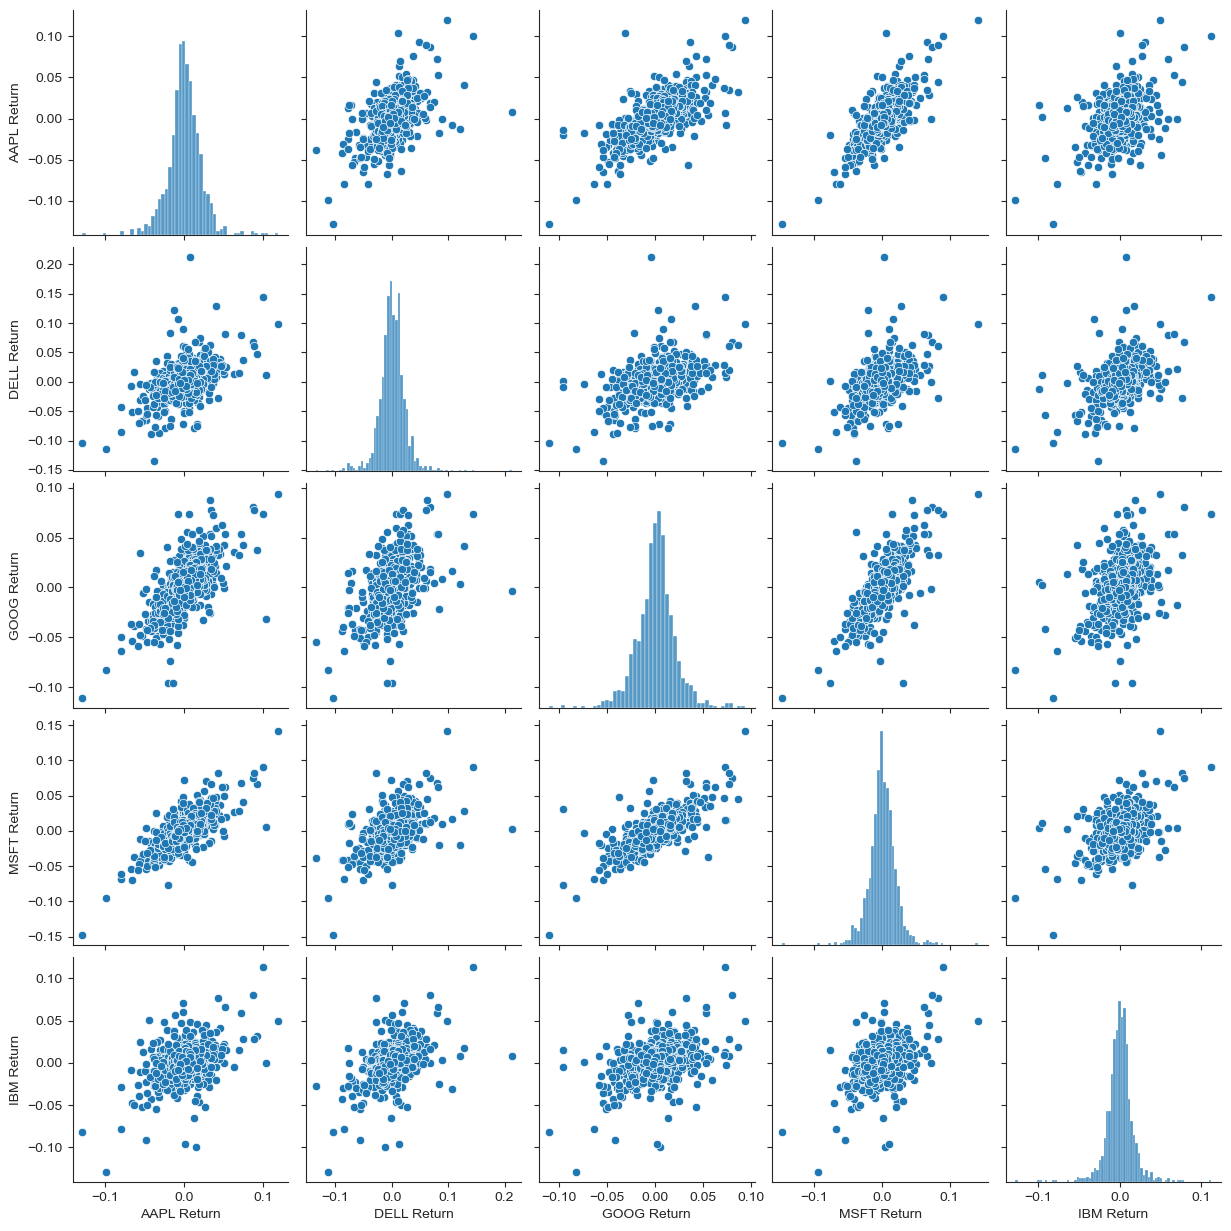

In [64]:
sns.pairplot(returns[1:])

<Axes: xlabel='Date'>

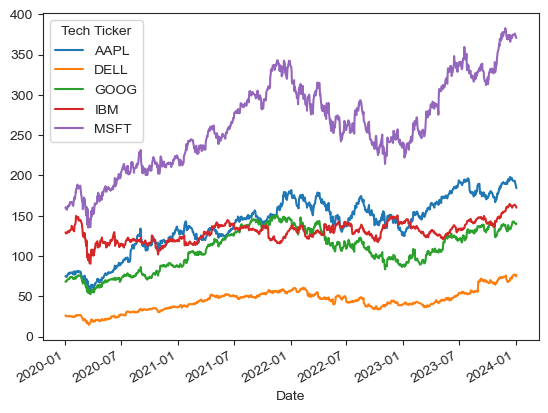

In [78]:
##Line plot of the close prices for each tech company
tech_stocks.xs(key = "Close", axis = 1, level = "Stock Info").plot()